<a href="https://colab.research.google.com/github/RushiaKawaii693/claim-analysis/blob/main/Claims.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [45]:
# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', 100)
pd.set_option('display.width', None)

In [46]:
# Set Visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [47]:
# Load the three CSV files
print("Loading data files...")
df_header = pd.read_csv('data/STONYBRK_20240531_HEADER.csv')
df_line = pd.read_csv('data/STONYBRK_20240531_LINE.csv')
df_code = pd.read_csv('data/STONYBRK_20240531_CODE.csv')
print("Data loaded successfully!")

Loading data files...
Data loaded successfully!


In [48]:
# HEADER File Exploration
print("="*80)
print("HEADER FILE EXPLORATION")
print("="*80)
print(f"Shape: {df_header.shape}")
print(f"First 5 rows:")
print(df_header.head())
print(f"Column names and data types:")
print(df_header.dtypes)
print(f"Missing values:")
print(df_header.isnull().sum())
print(f"Basic statistics:")
print(df_header.describe())

HEADER FILE EXPLORATION
Shape: (388, 43)
First 5 rows:
   ClientId  ProspectiveClaimId ClaimType  BillingProviderNPI  \
0        49            35216986         P          1154376309   
1        49            35235657         P          1154376309   
2        49            35249003         P          1154376309   
3        49            35249014         P          1154376309   
4        49            35249016         P          1154376309   

               BillingProvFirstName  BillingProvLastName  \
0  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
1  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
2  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
3  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
4  NEW YORK SPINE AND BRAIN SURGERY                  NaN   

   AttendingProviderNPI AttendingProvFirstName AttendingProvLastName  \
0                   NaN                    NaN                   NaN   
1                   NaN                    NaN   

In [49]:
# LINE File Exploration
print("\n" + "="*80)
print("LINE FILE EXPLORATION")
print("="*80)
print(f"Shape: {df_line.shape}")
print(f"\nFirst 5 rows:")
print(df_line.head())
print(f"\nColumn names and data types:")
print(df_line.dtypes)
print(f"\nMissing values:")
print(df_line.isnull().sum())
print(f"\nBasic statistics:")
print(df_line.describe())


LINE FILE EXPLORATION
Shape: (520, 28)

First 5 rows:
   ClientId  ProspectiveClaimId  LinePos  RevCode  HCPCS Modifier1 Modifier2  \
0        49            35216986        1      NaN  99291        GC        25   
1        49            35235657        1      NaN  99291        GC        25   
2        49            35244774        1      NaN  99291        GC        25   
3        49            35249003        1      NaN  99291        GC       NaN   
4        49            35249014        1      NaN  99291        GC       NaN   

   Modifier3  Modifier4            DxMapDelim  DxMap1  DxMap2  DxMap3  DxMap4  \
0        NaN        NaN  1,2,3,4,5,6,7,8,9,10       1     2.0     3.0     4.0   
1        NaN        NaN  1,2,3,4,5,6,7,8,9,10       1     2.0     3.0     4.0   
2        NaN        NaN  1,2,3,4,5,6,7,8,9,10       1     2.0     3.0     4.0   
3        NaN        NaN           1,2,3,4,5,6       1     2.0     3.0     4.0   
4        NaN        NaN           1,2,3,4,5,6       1     2

In [50]:
# CODE File Exploration
print("\n" + "="*80)
print("CODE FILE EXPLORATION")
print("="*80)
print(f"Shape: {df_code.shape}")
print(f"\nFirst 5 rows:")
print(df_code.head())
print(f"\nColumn names and data types:")
print(df_code.dtypes)
print(f"\nMissing values:")
print(df_code.isnull().sum())
print(f"\nBasic statistics:")
print(df_code.describe())


CODE FILE EXPLORATION
Shape: (1536, 9)

First 5 rows:
   ClientId  ProspectiveClaimId CodeQualifier  CodePos CodeValue  \
0        49            36752505           ABF        3     G93.6   
1        49            36819490           ABF        4     N17.9   
2        49            35352862           ABF        2     G06.1   
3        49            35244774           ABF       10     G90.8   
4        49            36745815           ABK        1   I77.819   

   CodeFromDate  CodeToDate  CodeAmnt  POAInd  
0           NaN         NaN       NaN     NaN  
1           NaN         NaN       NaN     NaN  
2           NaN         NaN       NaN     NaN  
3           NaN         NaN       NaN     NaN  
4           NaN         NaN       NaN     NaN  

Column names and data types:
ClientId                int64
ProspectiveClaimId      int64
CodeQualifier          object
CodePos                 int64
CodeValue              object
CodeFromDate          float64
CodeToDate            float64
CodeAmnt

In [51]:
# Key Observations
print("\n" + "="*80)
print("KEY OBSERVATIONS")
print("="*80)
# 1. How many unique claims?
unique_claims = df_header['ProspectiveClaimId'].nunique()
print(f"1. Number of unique claims: {unique_claims:,}")

# 2. Date range of claims
df_header['ServiceFromDate'] = pd.to_datetime(df_header['ServiceFromDate'])
df_header['ServiceToDate'] = pd.to_datetime(df_header['ServiceToDate'])
date_range = f"{df_header['ServiceFromDate'].min().date()} to {df_header['ServiceFromDate'].max().date()}"
print(f"2. Date range of claims: {date_range}")

# 3. Average service lines per claim
lines_per_claim = df_line.groupby('ProspectiveClaimId').size()
avg_lines = lines_per_claim.mean()
print(f"3. Average service lines per claim: {avg_lines:.2f}")
print(f"   - Min: {lines_per_claim.min()}, Max: {lines_per_claim.max()}")

# 4. Average diagnosis codes per claim
codes_per_claim = df_code.groupby('ProspectiveClaimId').size()
avg_codes = codes_per_claim.mean()
print(f"4. Average diagnosis codes per claim: {avg_codes:.2f}")
print(f"   - Min: {codes_per_claim.min()}, Max: {codes_per_claim.max()}")


KEY OBSERVATIONS
1. Number of unique claims: 388
2. Date range of claims: 2023-09-25 to 2024-05-29
3. Average service lines per claim: 1.34
   - Min: 1, Max: 7
4. Average diagnosis codes per claim: 3.96
   - Min: 1, Max: 12


In [52]:
## ============================================================
## PART 2: RELATIONAL DATA ANALYSIS
## ============================================================


QUESTION 1: TOP 5 BILLING PROVIDERS
                      Provider Name  Claim Count        NPI
                      SB INTERNISTS          152 1821035601
             SB SURGICAL ASSOCIATES           81 1063468536
   NEW YORK SPINE AND BRAIN SURGERY           69 1154376309
UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY           40 1538114723
          SB PSYCHIATRIC ASSOCIATES           36 1437105905


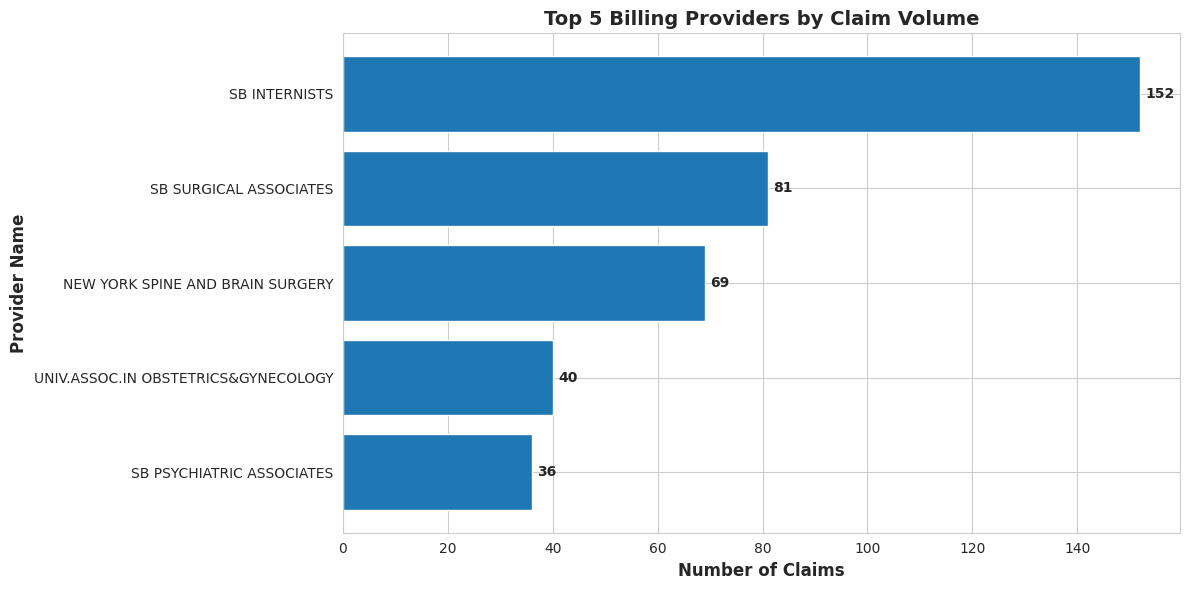

In [53]:
# Question 1: Provider Analysis
print("\n" + "="*80)
print("QUESTION 1: TOP 5 BILLING PROVIDERS")
print("="*80)

# Count providers
top_providers = (
    df_header['BillingProvFirstName']
        .value_counts()
        .reset_index()
)

top_providers.columns = ['Provider Name', 'Claim Count']

# Map NPIs using first names
provider_npi = df_header.groupby('BillingProvFirstName')['BillingProviderNPI'].first()
top_providers['NPI'] = top_providers['Provider Name'].map(provider_npi)

# Get the top 5 as a separate DataFrame
top5 = top_providers.head(5)

print(top5.to_string(index=False))

# Visualization
plt.figure(figsize=(12, 6))
plt.barh(top5['Provider Name'], top5['Claim Count'])
plt.xlabel('Number of Claims', fontsize=12, fontweight='bold')
plt.ylabel('Provider Name', fontsize=12, fontweight='bold')
plt.title('Top 5 Billing Providers by Claim Volume', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Add labels
for i, v in enumerate(top5['Claim Count']):
    plt.text(v + 1, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()



QUESTION 2: PAYER MIX ANALYSIS
                Payer Name  Claim Count  Percentage
                  MEDICARE          242       62.37
           HEALTHFIRST FFS           46       11.86
FIDELIS/BETTER HEALTH PLAN           26        6.70
              HIP MEDICAID           17        4.38
     HEALTHFIRST CAPITATED           10        2.58


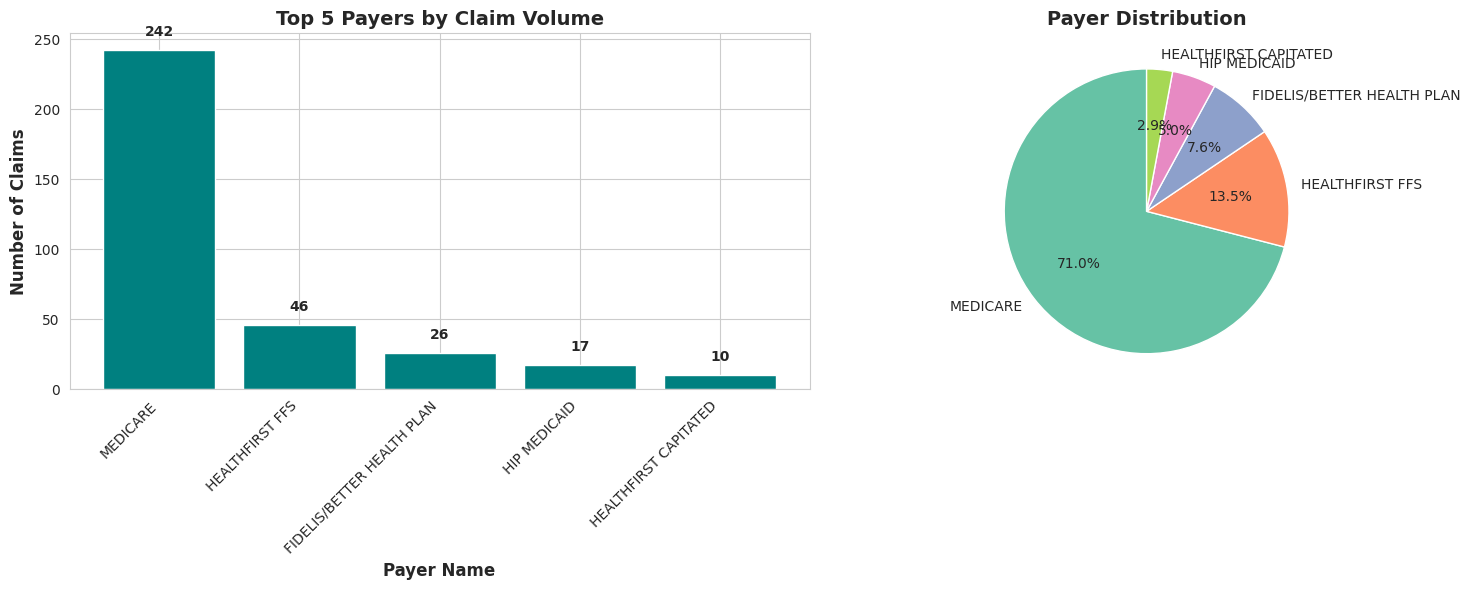

In [54]:
# Question 2: Payer Mix Analysis
print("\n" + "="*80)
print("QUESTION 2: PAYER MIX ANALYSIS")
print("="*80)

payer_counts = df_header['PrimaryPayerName'].value_counts().head(5).reset_index()
payer_counts.columns = ['Payer Name', 'Claim Count']
payer_counts['Percentage'] = (payer_counts['Claim Count'] / df_header.shape[0] * 100).round(2)

print(payer_counts.to_string(index=False))

# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
axes[0].bar(range(len(payer_counts)), payer_counts['Claim Count'], color='teal')
axes[0].set_xticks(range(len(payer_counts)))
axes[0].set_xticklabels(payer_counts['Payer Name'], rotation=45, ha='right')
axes[0].set_xlabel('Payer Name', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Claims', fontsize=12, fontweight='bold')
axes[0].set_title('Top 5 Payers by Claim Volume', fontsize=14, fontweight='bold')
for i, v in enumerate(payer_counts['Claim Count']):
    axes[0].text(i, v + 10, str(v), ha='center', fontweight='bold')

# Pie chart
axes[1].pie(payer_counts['Claim Count'], labels=payer_counts['Payer Name'],
            autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
axes[1].set_title('Payer Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


QUESTION 3: TOP 10 DIAGNOSIS CODES
ICD-10 Code  Frequency
     J96.01         62
        I10         49
      E78.5         49
      G93.5         34
      D64.9         29
     I25.10         27
      I61.9         26
     I48.91         24
      I60.8         24
      I50.9         22

Note: Look up these codes at icd10data.com for detailed descriptions


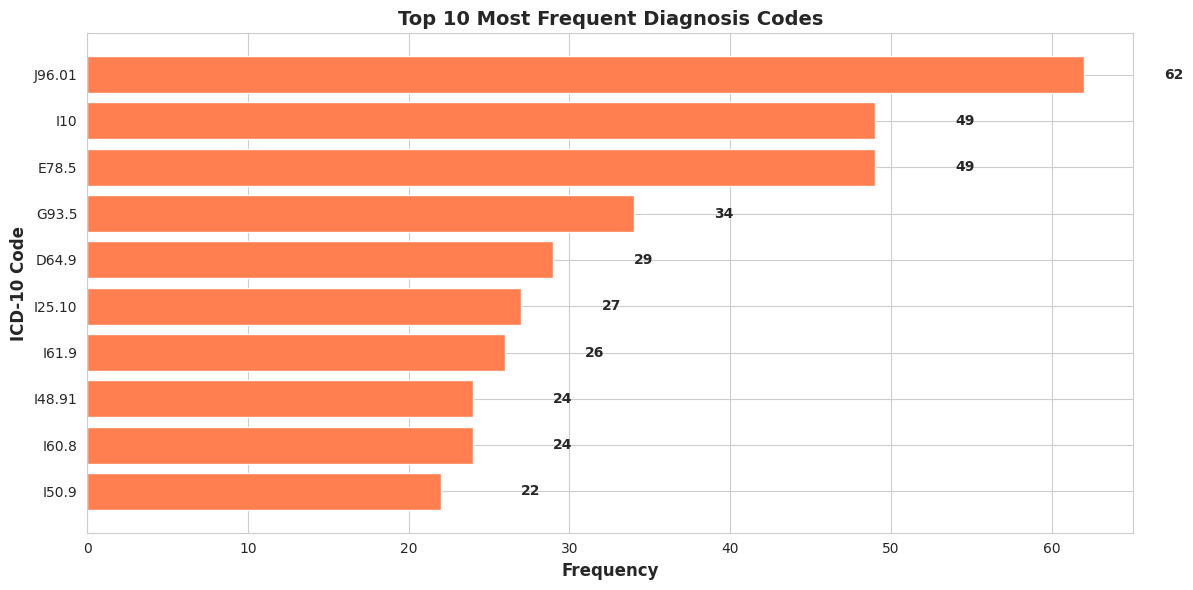

In [55]:
# Question 3: Common Diagnoses
print("\n" + "="*80)
print("QUESTION 3: TOP 10 DIAGNOSIS CODES")
print("="*80)

top_diagnoses = df_code['CodeValue'].value_counts().head(10).reset_index()
top_diagnoses.columns = ['ICD-10 Code', 'Frequency']

print(top_diagnoses.to_string(index=False))
print("\nNote: Look up these codes at icd10data.com for detailed descriptions")

# Visualization
plt.figure(figsize=(12, 6))
plt.barh(top_diagnoses['ICD-10 Code'], top_diagnoses['Frequency'], color='coral')
plt.xlabel('Frequency', fontsize=12, fontweight='bold')
plt.ylabel('ICD-10 Code', fontsize=12, fontweight='bold')
plt.title('Top 10 Most Frequent Diagnosis Codes', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
for i, v in enumerate(top_diagnoses['Frequency']):
    plt.text(v + 5, i, str(v), va='center', fontweight='bold')
plt.tight_layout()
plt.show()


QUESTION 4: TOP 10 PROCEDURE CODES
HCPCS Code  Frequency
     99291         68
     99233         48
     99213         39
     99223         33
     99222         32
     99232         21
     90833         16
     99204         14
     99214         14
     92557         14


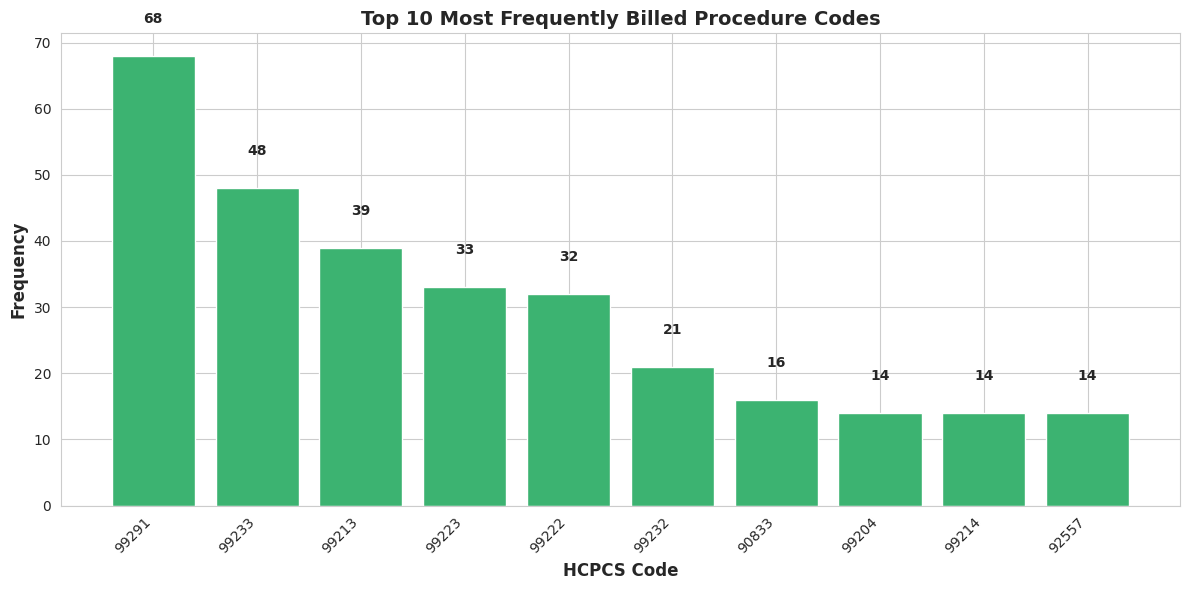

In [56]:
# Question 4: Common Procedures
print("\n" + "="*80)
print("QUESTION 4: TOP 10 PROCEDURE CODES")
print("="*80)

top_procedures = df_line['HCPCS'].value_counts().head(10).reset_index()
top_procedures.columns = ['HCPCS Code', 'Frequency']

print(top_procedures.to_string(index=False))

# Visualization
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_procedures)), top_procedures['Frequency'], color='mediumseagreen')
plt.xticks(range(len(top_procedures)), top_procedures['HCPCS Code'], rotation=45, ha='right')
plt.xlabel('HCPCS Code', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Top 10 Most Frequently Billed Procedure Codes', fontsize=14, fontweight='bold')
for i, v in enumerate(top_procedures['Frequency']):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

In [57]:
# Question 5: Service Location Analysis
print("\n" + "="*80)
print("QUESTION 5: SERVICE LOCATION ANALYSIS")
print("="*80)

# Count all POS codes
location_counts = (
    df_header['PlaceOfService']
        .value_counts()
        .reset_index()
)

location_counts.columns = ['Place of Service (POS Code)', 'Claim Count']
location_counts['Percentage'] = (
    location_counts['Claim Count'] / df_header.shape[0] * 100
).round(2)

print(location_counts.to_string(index=False))

# --- Correct POS-based matching ---
# 21 = Inpatient Hospital
# 11 = Office

inpatient = df_header[df_header['PlaceOfService'] == 21].shape[0]
doctors_office = df_header[df_header['PlaceOfService'] == 11].shape[0]
total = df_header.shape[0]

print(f"\nInpatient claims (POS 21): {inpatient} ({inpatient/total*100:.2f}%)")
print(f"Doctor's Office claims (POS 11): {doctors_office} ({doctors_office/total*100:.2f}%)")


QUESTION 5: SERVICE LOCATION ANALYSIS
 Place of Service (POS Code)  Claim Count  Percentage
                          21          231       59.54
                          11          132       34.02
                          22           24        6.19
                          23            1        0.26

Inpatient claims (POS 21): 231 (59.54%)
Doctor's Office claims (POS 11): 132 (34.02%)


In [58]:
## ============================================================
## PART 3: ADVANCED ANALYSIS WITH JOINS
## ============================================================

In [59]:
# Question 6: Claims with High Service Line Counts
print("\n" + "="*80)
print("QUESTION 6: CLAIMS WITH HIGH SERVICE LINE COUNTS (5+)")
print("="*80)

# Calculate lines per claim
line_counts = df_line.groupby('ProspectiveClaimId').agg({
    'LinePos': 'count',
    'Charges': 'sum'
}).reset_index()
line_counts.columns = ['ProspectiveClaimId', 'LineCount', 'TotalCharges']

#Merge with header to get provider info
high_line_claims = line_counts[line_counts['LineCount'] >= 5].merge(
        df_header[['ProspectiveClaimId', 'BillingProvFirstName']],
        on='ProspectiveClaimId'
)
high_line_claims = high_line_claims.sort_values('LineCount', ascending=False)
print(f"\nFound {len(high_line_claims)} claims with 5+ service lines\n")
print(high_line_claims.head(10).to_string(index=False))



QUESTION 6: CLAIMS WITH HIGH SERVICE LINE COUNTS (5+)

Found 5 claims with 5+ service lines

 ProspectiveClaimId  LineCount  TotalCharges                BillingProvFirstName
           36794825          7          1163               SB CHILDREN'S SERVICE
           36668119          6          1030 UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY
           36740402          6           945 UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY
           36710175          5           873 UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY
           36757684          5           873 UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY




🔗 QUESTION 7: Diagnosis-Procedure Combinations
--------------------------------------------------------------------------------
After merging header + line: 520 rows
After merging with codes: 1,896 rows

🔍 Analysis: Diagnoses associated with CPT 99291 (Critical care, first hour)

CPT 99291 appears in 636 line items

Top 10 Diagnoses Associated with CPT 99291:
ICD10_Code  Frequency
    J96.01         53
     G93.5         34
     E78.5         33
     I61.9         26
     D64.9         25
       I10         24
     I60.8         24
     I95.9         20
   D72.829         19
   I67.848         17


📊 Top 10 Overall Diagnosis-Procedure Combinations:
CodeValue HCPCS  Count
   J96.01 99291     53
    G93.5 99291     34
    E78.5 99291     33
    I61.9 99291     26
    D64.9 99291     25
    I60.8 99291     24
      I10 99291     24
    I95.9 99291     20
  D72.829 99291     19
  I67.848 99291     17


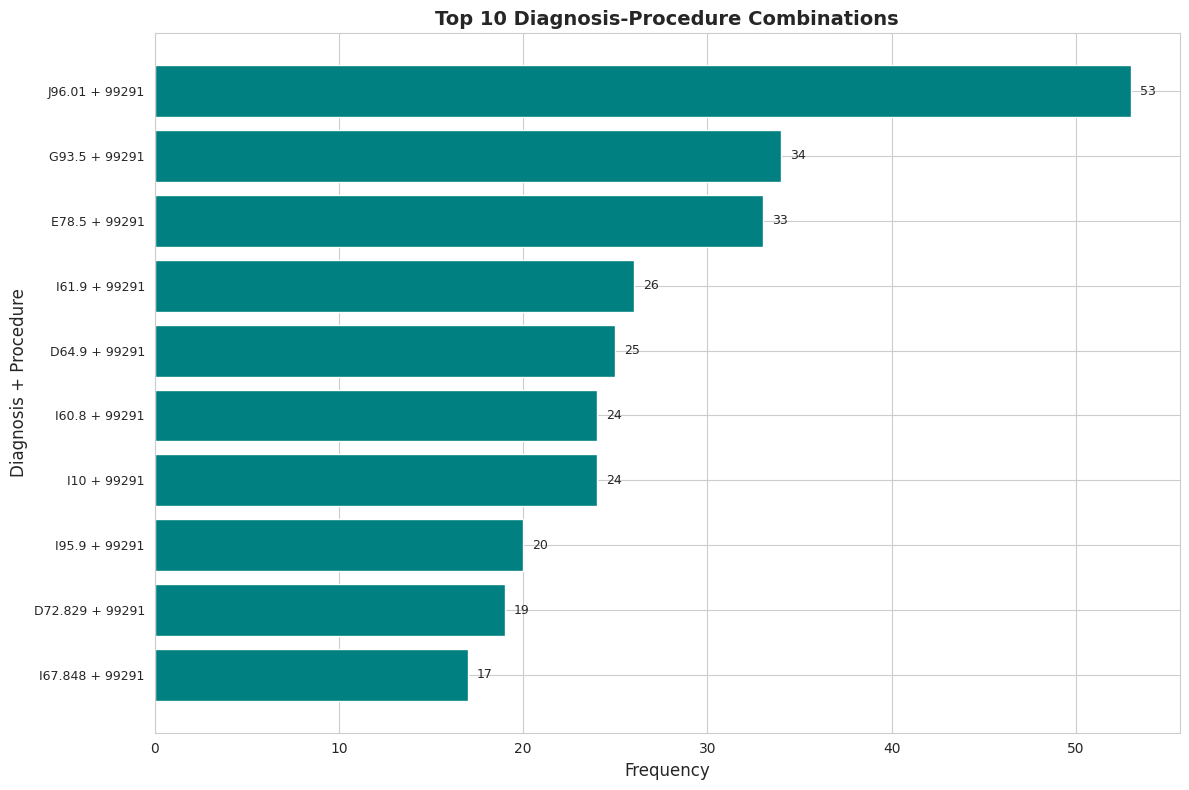

In [60]:
# Question 7: Diagnosis-Procedure Combinations
# ----------------------------------------------------------------------------

print("\n\n🔗 QUESTION 7: Diagnosis-Procedure Combinations")
print("-"*80)

# Step 1: Merge all three files
# First merge: header + line
claim_line = df_header.merge(df_line, on='ProspectiveClaimId', how='inner')
print(f"After merging header + line: {len(claim_line):,} rows")

# Second merge: add codes
full_data = claim_line.merge(df_code, on='ProspectiveClaimId', how='inner')
print(f"After merging with codes: {len(full_data):,} rows")

# Step 2: Find most common diagnosis with CPT 99291
print("\n🔍 Analysis: Diagnoses associated with CPT 99291 (Critical care, first hour)")

cpt_99291_data = full_data[full_data['HCPCS'] == '99291']

if len(cpt_99291_data) > 0:
    top_dx_with_99291 = cpt_99291_data['CodeValue'].value_counts().head(10).reset_index()
    top_dx_with_99291.columns = ['ICD10_Code', 'Frequency']

    print(f"\nCPT 99291 appears in {len(cpt_99291_data)} line items")
    print(f"\nTop 10 Diagnoses Associated with CPT 99291:")
    print(top_dx_with_99291.to_string(index=False))
else:
    print("\n⚠️  CPT 99291 not found in this dataset")

# Step 3: Most common diagnosis-procedure pairs overall
print("\n\n📊 Top 10 Overall Diagnosis-Procedure Combinations:")

dx_proc_pairs = full_data.groupby(['CodeValue', 'HCPCS']).size().reset_index(name='Count')
dx_proc_pairs = dx_proc_pairs.sort_values('Count', ascending=False)

print(dx_proc_pairs.head(10).to_string(index=False))

# Visualization - top combinations
top_10_pairs = dx_proc_pairs.head(10).copy()
top_10_pairs['Combination'] = top_10_pairs['CodeValue'] + ' + ' + top_10_pairs['HCPCS']

plt.figure(figsize=(12, 8))
plt.barh(range(len(top_10_pairs)), top_10_pairs['Count'], color='teal')
plt.yticks(range(len(top_10_pairs)), top_10_pairs['Combination'], fontsize=9)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Diagnosis + Procedure', fontsize=12)
plt.title('Top 10 Diagnosis-Procedure Combinations', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Add value labels
for i, v in enumerate(top_10_pairs['Count']):
    plt.text(v + 0.5, i, str(v), va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [61]:
# Question 8: Charges by Payer
print("\n" + "="*80)
print("QUESTION 8: CHARGES BY PAYER")
print("="*80)

# Merge header and line files
claims_charges = df_line.groupby('ProspectiveClaimId')['Charges'].sum().reset_index()
claims_charges.columns = ['ProspectiveClaimId', 'TotalCharges']

payer_charges = claims_charges.merge(
    df_header[['ProspectiveClaimId', 'PrimaryPayerName']],
    on='ProspectiveClaimId'
)

# Group by payer
payer_summary = payer_charges.groupby('PrimaryPayerName').agg({
    'TotalCharges': ['sum', 'mean', 'count']
}).reset_index()

payer_summary.columns = ['Payer Name', 'Total Charges', 'Avg Charges per Claim', 'Number of Claims']
payer_summary = payer_summary.sort_values('Total Charges', ascending=False).head(10)

# Format currency
payer_summary['Total Charges'] = payer_summary['Total Charges'].apply(lambda x: f"$${x:,.2f}")
payer_summary['Avg Charges per Claim'] = payer_summary['Avg Charges per Claim'].apply(lambda x: f"$${x:,.2f}")

print(payer_summary.to_string(index=False))


QUESTION 8: CHARGES BY PAYER
                        Payer Name Total Charges Avg Charges per Claim  Number of Claims
                          MEDICARE  $$131,008.00              $$541.36               242
                   HEALTHFIRST FFS   $$29,794.00              $$647.70                46
        FIDELIS/BETTER HEALTH PLAN   $$10,810.00              $$415.77                26
                      HIP MEDICAID   $$10,014.00              $$589.06                17
                             AETNA    $$6,930.00            $$1,155.00                 6
                   DIRECT SELF PAY    $$6,575.00            $$1,095.83                 6
UNITED COMMUNITY PLAN GOVT PROGRAM    $$5,175.00            $$1,035.00                 5
             HEALTHFIRST CAPITATED    $$4,905.00              $$490.50                10
                    EMPIRE BLUE SR    $$4,620.00            $$1,155.00                 4
                         MAGNACARE    $$3,465.00            $$1,155.00          



💵 QUESTION 8: Charges by Payer
--------------------------------------------------------------------------------
Calculated total charges for 388 claims

Top 10 Payers by Total Charges:
                        Payer_Name  Total_Charges  Avg_Charges_Per_Claim  Claim_Count
                          MEDICARE         131008             541.355372          242
                   HEALTHFIRST FFS          29794             647.695652           46
        FIDELIS/BETTER HEALTH PLAN          10810             415.769231           26
                      HIP MEDICAID          10014             589.058824           17
                             AETNA           6930            1155.000000            6
                   DIRECT SELF PAY           6575            1095.833333            6
UNITED COMMUNITY PLAN GOVT PROGRAM           5175            1035.000000            5
             HEALTHFIRST CAPITATED           4905             490.500000           10
                    EMPIRE BLUE SR     

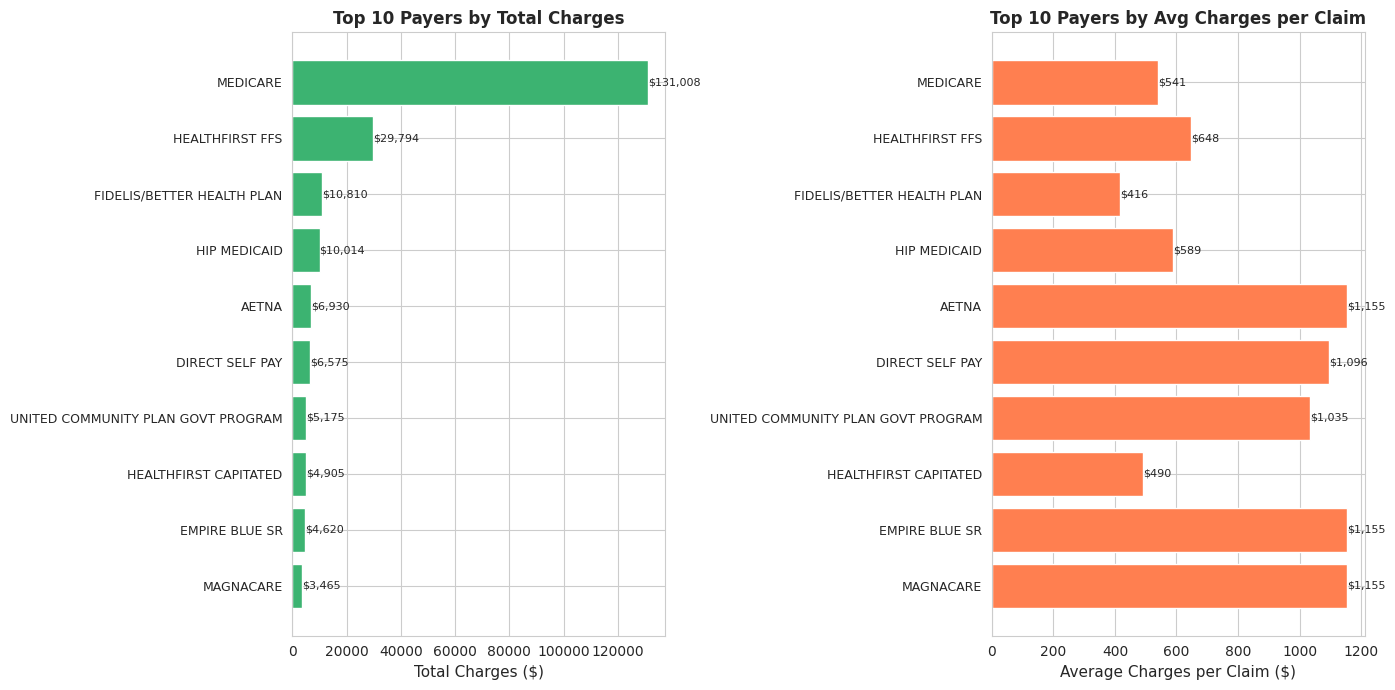


PART 3 COMPLETE ✓


In [62]:
# Question 8: Charges by Payer
# ----------------------------------------------------------------------------

print("\n\n💵 QUESTION 8: Charges by Payer")
print("-"*80)

# Step 1: Calculate total charges per claim (to avoid double counting)
claim_total_charges = df_line.groupby('ProspectiveClaimId')['Charges'].sum().reset_index()
claim_total_charges.columns = ['ProspectiveClaimId', 'Total_Claim_Charges']

print(f"Calculated total charges for {len(claim_total_charges):,} claims")

# Step 2: Merge with header to get payer information
payer_charges = df_header.merge(claim_total_charges, on='ProspectiveClaimId', how='inner')

# Step 3: Aggregate by payer
payer_summary = payer_charges.groupby('PrimaryPayerName').agg({
    'Total_Claim_Charges': ['sum', 'mean', 'count']
}).reset_index()

# Flatten column names
payer_summary.columns = ['Payer_Name', 'Total_Charges', 'Avg_Charges_Per_Claim', 'Claim_Count']

# Sort by total charges
payer_summary = payer_summary.sort_values('Total_Charges', ascending=False)

# Display top 10
print("\nTop 10 Payers by Total Charges:")
print(payer_summary.head(10).to_string(index=False))

# Calculate percentage of total charges
total_all_charges = payer_summary['Total_Charges'].sum()
payer_summary['Pct_of_Total'] = (payer_summary['Total_Charges'] / total_all_charges * 100).round(2)

print(f"\n📊 Key Metrics:")
print(f"   Total charges across all payers: ${total_all_charges:,.2f}")
print(f"   Average charge per claim (all): ${payer_summary['Avg_Charges_Per_Claim'].mean():,.2f}")

# Visualization 1: Bar chart - Total charges
plt.figure(figsize=(14, 7))
top_10_payers = payer_summary.head(10)

plt.subplot(1, 2, 1)
plt.barh(range(len(top_10_payers)), top_10_payers['Total_Charges'], color='mediumseagreen')
plt.yticks(range(len(top_10_payers)), top_10_payers['Payer_Name'], fontsize=9)
plt.xlabel('Total Charges ($)', fontsize=11)
plt.title('Top 10 Payers by Total Charges', fontsize=12, fontweight='bold')
plt.gca().invert_yaxis()

# Add value labels
for i, v in enumerate(top_10_payers['Total_Charges']):
    plt.text(v, i, f'${v:,.0f}', va='center', ha='left', fontsize=8)

# Visualization 2: Bar chart - Average charges per claim
plt.subplot(1, 2, 2)
plt.barh(range(len(top_10_payers)), top_10_payers['Avg_Charges_Per_Claim'], color='coral')
plt.yticks(range(len(top_10_payers)), top_10_payers['Payer_Name'], fontsize=9)
plt.xlabel('Average Charges per Claim ($)', fontsize=11)
plt.title('Top 10 Payers by Avg Charges per Claim', fontsize=12, fontweight='bold')
plt.gca().invert_yaxis()

# Add value labels
for i, v in enumerate(top_10_payers['Avg_Charges_Per_Claim']):
    plt.text(v, i, f'${v:,.0f}', va='center', ha='left', fontsize=8)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("PART 3 COMPLETE ✓")
print("="*80)



In [63]:
# ============================================================================
# PART 4: CREATIVE ANALYSIS
# ============================================================================


QUESTION 9: CUSTOM ANALYSIS
Complex Cases: Which Providers Handle the Most Complex Cases?
                      Provider Name  Avg Diagnoses per Claim  Total Claims
   NEW YORK SPINE AND BRAIN SURGERY                 9.231884            69
                      SB INTERNISTS                 3.592105           152
              SB CHILDREN'S SERVICE                 3.333333             9
UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY                 2.125000            40
             SB SURGICAL ASSOCIATES                 2.049383            81
          SB PSYCHIATRIC ASSOCIATES                 1.805556            36


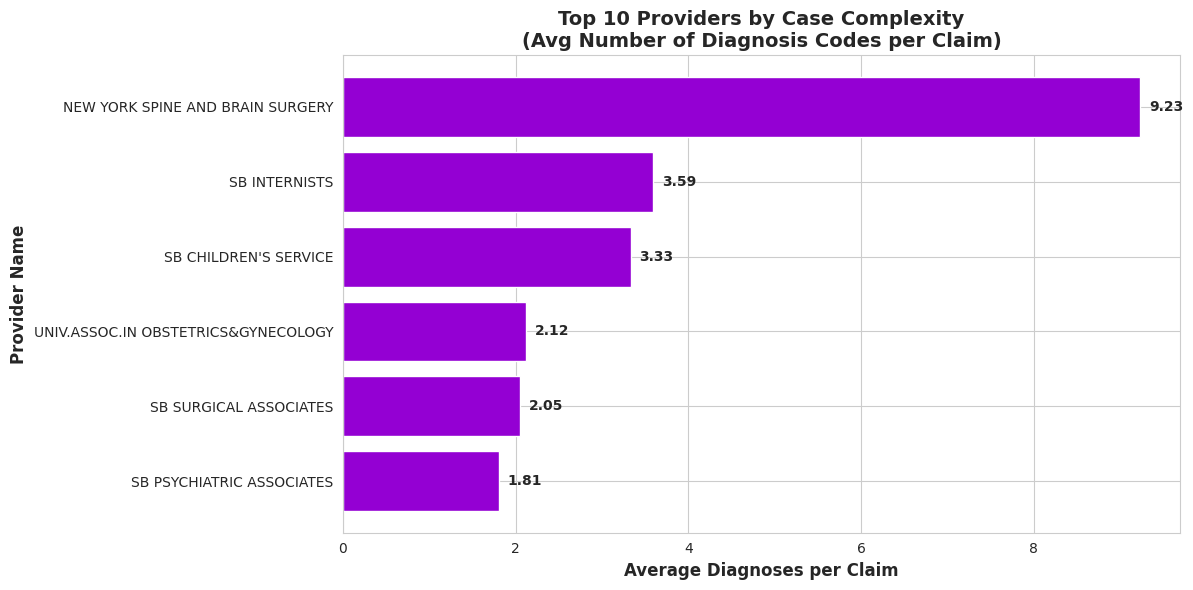


ANALYSIS COMPLETE!

📊 KEY FINDINGS SUMMARY:
- Total unique claims analyzed: 388
- Date range: 2023-09-25 to 2024-05-29
- Average service lines per claim: 1.34
- Average diagnosis codes per claim: 3.96
- Total providers: 7
- Total payers: 24
- Unique diagnosis codes: 489
- Unique procedure codes: 95


In [64]:
print("\n" + "="*80)
print("QUESTION 9: CUSTOM ANALYSIS")
print("Complex Cases: Which Providers Handle the Most Complex Cases?")
print("="*80)

# Complexity defined by number of diagnosis codes per claim
claim_complexity = df_code.groupby('ProspectiveClaimId').size().reset_index()
claim_complexity.columns = ['ProspectiveClaimId', 'DiagnosisCount']

# Merge with provider information
provider_complexity = claim_complexity.merge(
    df_header[['ProspectiveClaimId', 'BillingProvFirstName']],
    on='ProspectiveClaimId'
)

# Calculate average complexity per provider
provider_avg_complexity = provider_complexity.groupby('BillingProvFirstName').agg({
    'DiagnosisCount': ['mean', 'count']
}).reset_index()

provider_avg_complexity.columns = ['Provider Name', 'Avg Diagnoses per Claim', 'Total Claims']

# Filter providers with at least 5 claims
provider_avg_complexity = provider_avg_complexity[provider_avg_complexity['Total Claims'] >= 5]
provider_avg_complexity = provider_avg_complexity.sort_values('Avg Diagnoses per Claim', ascending=False).head(10)

print(provider_avg_complexity.to_string(index=False))

# Visualization
plt.figure(figsize=(12, 6))
plt.barh(provider_avg_complexity['Provider Name'],
         provider_avg_complexity['Avg Diagnoses per Claim'],
         color='darkviolet')
plt.xlabel('Average Diagnoses per Claim', fontsize=12, fontweight='bold')
plt.ylabel('Provider Name', fontsize=12, fontweight='bold')
plt.title('Top 10 Providers by Case Complexity\n(Avg Number of Diagnosis Codes per Claim)',
          fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
for i, v in enumerate(provider_avg_complexity['Avg Diagnoses per Claim']):
    plt.text(v + 0.1, i, f'{v:.2f}', va='center', fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("ANALYSIS COMPLETE!")
print("="*80)

# Summary Statistics
print("\n📊 KEY FINDINGS SUMMARY:")
print(f"- Total unique claims analyzed: {unique_claims:,}")
print(f"- Date range: {date_range}")
print(f"- Average service lines per claim: {avg_lines:.2f}")
print(f"- Average diagnosis codes per claim: {avg_codes:.2f}")
print(f"- Total providers: {df_header['BillingProvFirstName'].nunique()}")
print(f"- Total payers: {df_header['PrimaryPayerName'].nunique()}")
print(f"- Unique diagnosis codes: {df_code['CodeValue'].nunique()}")
print(f"- Unique procedure codes: {df_line['HCPCS'].nunique()}");